In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#importing data sets
Customer_Acquisition = pd.read_csv('C:/Users/Sai Sahishnu/Desktop/life robber/Customer Acqusition.csv')
Customer_Acquisition

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed


In [4]:
Spend_Transaction_data = pd.read_csv('C:/Users/Sai Sahishnu/Desktop/life robber/spend.csv')
Spend_Transaction_data


,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...
1495,1496,A67,4-Feb-06,BUS TICKET,356872.73
1496,1497,A68,25-Mar-06,BUS TICKET,204971.10
1497,1498,A69,31-Mar-06,BUS TICKET,50449.44
1498,1499,A70,23-Mar-06,BUS TICKET,80593.94


In [5]:
Repayment= pd.read_csv('C:/Users/Sai Sahishnu/Desktop/life robber/Repayment.csv')
Repayment

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN
...,...,...,...,...,...
1518,NaN,NaN,NaN,NaN,NaN
1519,NaN,NaN,NaN,NaN,NaN
1520,NaN,NaN,NaN,NaN,NaN
1521,NaN,NaN,NaN,NaN,NaN


In [6]:
Repayment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SL No:      1499 non-null   float64
 1   Customer    1500 non-null   object 
 2   Month       1500 non-null   object 
 3   Amount      1500 non-null   float64
 4   Unnamed: 4  0 non-null      float64
dtypes: float64(3), object(2)
memory usage: 59.6+ KB


Following are some of Mr. Watson’s questions to a Consultant (like you) to understand the 
customers spend & repayment behavior.
1. In the above dataset,
 a. In case age is less than 18, replace it with mean of age values.


In [7]:

Customer_Acquisition.loc[Customer_Acquisition['Age']<18,'Age'] = Customer_Acquisition.Age.mean()
Customer_Acquisition


,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34.0,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47.0,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56.0,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed


b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. 
(customer’s limit provided in acquisition table is the per transaction limit on his card)


In [8]:
data = pd.merge(left = Customer_Acquisition,right = Spend_Transaction_data,how = 'inner',left_on = Customer_Acquisition.Customer,right_on =  Spend_Transaction_data.Customer ,indicator = True)

In [9]:
data

,key_0,No,Customer_x,Age,City,Product,Limit,Company,Segment,Sl No:,Customer_y,Month,Type,Amount,_merge
0,A1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,A1,12-Jan-04,JEWELLERY,485470.80,both
1,A1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,A1,3-Jan-04,PETRO,410556.13,both
2,A1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,A1,15-Jan-04,CLOTHES,23740.46,both
3,A1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,A1,25-Jan-04,FOOD,484342.47,both
4,A1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,A1,17-Jan-05,CAMERA,369694.07,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,A96,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,A96,25-Jan-04,BIKE,54729.66,both
1496,A97,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,A97,12-Jan-04,AUTO,139018.26,both
1497,A98,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,A98,3-Jan-04,SHOPPING,284521.06,both
1498,A99,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,A99,15-Jan-04,AIR TICKET,90184.22,both


In [9]:
spend_limit = data[data.Amount > data.Limit]
per_cust_limit = 0.50*spend_limit.Limit
data.loc[data['Amount'] > data['Limit'],['Amount','Limit']] = per_cust_limit
data

,key_0,No,Customer_x,Age,City,Product,Limit,Company,Segment,Sl No:,Customer_y,Month,Type,Amount,_merge
0,A1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,A1,12-Jan-04,JEWELLERY,485470.80,both
1,A1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,A1,3-Jan-04,PETRO,410556.13,both
2,A1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,A1,15-Jan-04,CLOTHES,23740.46,both
3,A1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,A1,25-Jan-04,FOOD,484342.47,both
4,A1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,A1,17-Jan-05,CAMERA,369694.07,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,A96,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,A96,25-Jan-04,BIKE,54729.66,both
1496,A97,97,A97,58.0,TRIVANDRUM,Platimum,5000.0,C20,Govt,99,A97,12-Jan-04,AUTO,5000.00,both
1497,A98,98,A98,51.0,CALCUTTA,Platimum,5000.5,C21,Normal Salary,100,A98,3-Jan-04,SHOPPING,5000.50,both
1498,A99,99,A99,35.0,CALCUTTA,Platimum,5001.0,C22,Self Employed,101,A99,15-Jan-04,AIR TICKET,5001.00,both


 c. Incase the repayment amount is more than the limit, replace the repayment with the limit

In [10]:
data2 = pd.merge(left = data,right = Repayment,left_on = 'Customer_x',right_on = 'Customer',how = 'inner')
data2

,key_0,No,Customer_x,Age,City,Product,Limit,Company,Segment,Sl No:,Customer_y,Month_x,Type,Amount_x,_merge,SL No:,Customer,Month_y,Amount_y,Unnamed: 4
0,A1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,A1,12-Jan-04,JEWELLERY,485470.80,both,NaN,A1,12-Jan-04,495414.75,NaN
1,A1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,A1,12-Jan-04,JEWELLERY,485470.80,both,2.0,A1,3-Jan-04,245899.02,NaN
2,A1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,A1,12-Jan-04,JEWELLERY,485470.80,both,3.0,A1,15-Jan-04,259490.06,NaN
3,A1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,A1,12-Jan-04,JEWELLERY,485470.80,both,4.0,A1,25-Jan-04,437555.12,NaN
4,A1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,A1,12-Jan-04,JEWELLERY,485470.80,both,5.0,A1,17-Jan-05,165972.88,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37279,A96,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,A96,25-Jan-04,BIKE,54729.66,both,98.0,A96,25-Jan-04,310992.30,NaN
37280,A97,97,A97,58.0,TRIVANDRUM,Platimum,5000.0,C20,Govt,99,A97,12-Jan-04,AUTO,5000.00,both,99.0,A97,12-Jan-04,121874.90,NaN
37281,A98,98,A98,51.0,CALCUTTA,Platimum,5000.5,C21,Normal Salary,100,A98,3-Jan-04,SHOPPING,5000.50,both,100.0,A98,3-Jan-04,337815.57,NaN
37282,A99,99,A99,35.0,CALCUTTA,Platimum,5001.0,C22,Self Employed,101,A99,15-Jan-04,AIR TICKET,5001.00,both,101.0,A99,15-Jan-04,25682.73,NaN


In [11]:
repayment_amt = data2.loc[data2['Amount_y']>data2['Limit'],['Amount','Limit']] = data2.Limit
data2

,key_0,No,Customer_x,Age,City,Product,Limit,Company,Segment,Sl No:,...,Month_x,Type,Amount_x,_merge,SL No:,Customer,Month_y,Amount_y,Unnamed: 4,Amount
0,A1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,...,12-Jan-04,JEWELLERY,485470.80,both,NaN,A1,12-Jan-04,495414.75,NaN,NaN
1,A1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,...,12-Jan-04,JEWELLERY,485470.80,both,2.0,A1,3-Jan-04,245899.02,NaN,NaN
2,A1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,...,12-Jan-04,JEWELLERY,485470.80,both,3.0,A1,15-Jan-04,259490.06,NaN,NaN
3,A1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,...,12-Jan-04,JEWELLERY,485470.80,both,4.0,A1,25-Jan-04,437555.12,NaN,NaN
4,A1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,...,12-Jan-04,JEWELLERY,485470.80,both,5.0,A1,17-Jan-05,165972.88,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37279,A96,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,...,25-Jan-04,BIKE,54729.66,both,98.0,A96,25-Jan-04,310992.30,NaN,100000.0
37280,A97,97,A97,58.0,TRIVANDRUM,Platimum,5000.0,C20,Govt,99,...,12-Jan-04,AUTO,5000.00,both,99.0,A97,12-Jan-04,121874.90,NaN,5000.0
37281,A98,98,A98,51.0,CALCUTTA,Platimum,5000.5,C21,Normal Salary,100,...,3-Jan-04,SHOPPING,5000.50,both,100.0,A98,3-Jan-04,337815.57,NaN,5000.5
37282,A99,99,A99,35.0,CALCUTTA,Platimum,5001.0,C22,Self Employed,101,...,15-Jan-04,AIR TICKET,5001.00,both,101.0,A99,15-Jan-04,25682.73,NaN,5001.0


2. From the above dataset create the following summaries:
 a. How many distinct customers exist?

In [12]:
print('Distinct Customers:', Customer_Acquisition.Customer.nunique())

Distinct Customers: 100


b. How many distinct categories exist?


In [13]:
print('distinct product :', Customer_Acquisition.Product.nunique())
print('distinct segment :', Customer_Acquisition.Segment.nunique())
print('distinct type :', Spend_Transaction_data.Type.nunique())

distinct product : 3
distinct segment : 5
distinct type : 15


c. What is the average monthly spend by customers?

In [14]:
data

,key_0,No,Customer_x,Age,City,Product,Limit,Company,Segment,Sl No:,Customer_y,Month,Type,Amount,_merge
0,A1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,A1,12-Jan-04,JEWELLERY,485470.80,both
1,A1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,A1,3-Jan-04,PETRO,410556.13,both
2,A1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,A1,15-Jan-04,CLOTHES,23740.46,both
3,A1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,A1,25-Jan-04,FOOD,484342.47,both
4,A1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,A1,17-Jan-05,CAMERA,369694.07,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,A96,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,A96,25-Jan-04,BIKE,54729.66,both
1496,A97,97,A97,58.0,TRIVANDRUM,Platimum,5000.0,C20,Govt,99,A97,12-Jan-04,AUTO,5000.00,both
1497,A98,98,A98,51.0,CALCUTTA,Platimum,5000.5,C21,Normal Salary,100,A98,3-Jan-04,SHOPPING,5000.50,both
1498,A99,99,A99,35.0,CALCUTTA,Platimum,5001.0,C22,Self Employed,101,A99,15-Jan-04,AIR TICKET,5001.00,both


In [16]:
data['Month'] = pd.to_datetime(data['Month'])
data['month'] = pd.DatetimeIndex(data.Month).month
avg_spent_cust = data.groupby(['Customer_y','month']).agg({'Amount':'mean'})
avg_spent_cust

Amount
Customer_y month               
A1         1      372762.587143
           2      175235.690000
           4      261649.250000
           5      361141.310000
           8      344372.100000
...                         ...
A95        1      240401.500000
A96        1       54729.660000
A97        1        5000.000000
A98        1        5000.500000
A99        1        5001.000000

[578 rows x 1 columns]

d. What is the average monthly repayment by customers?


In [15]:
Repayment

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN
...,...,...,...,...,...
1518,NaN,NaN,NaN,NaN,NaN
1519,NaN,NaN,NaN,NaN,NaN
1520,NaN,NaN,NaN,NaN,NaN
1521,NaN,NaN,NaN,NaN,NaN


In [16]:
Repayment['Month'] = pd.to_datetime(Repayment['Month'])
Repayment['month'] = pd.DatetimeIndex(Repayment.Month).month
avg_spent = Repayment.groupby(['Customer','month']).agg({'Amount':'mean'})
avg_spent

Amount
Customer month               
A1       1.0    343972.327143
         2.0    156374.760000
         4.0    254474.580000
         7.0    297176.740000
         9.0    186427.500000
...                       ...
A95      1.0    369405.960000
A96      1.0    310992.300000
A97      1.0    121874.900000
A98      1.0    337815.570000
A99      1.0     25682.730000

[558 rows x 1 columns]

 e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? 
(Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment 
– Monthly spend. Interest is earned only on positive profits and not on negative amounts)

In [17]:
data2.head()

,key_0,No,Customer_x,Age,City,Product,Limit,Company,Segment,Sl No:,...,Month_x,Type,Amount_x,_merge,SL No:,Customer,Month_y,Amount_y,Unnamed: 4,Amount
0,A1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,...,12-Jan-04,JEWELLERY,485470.8,both,NaN,A1,12-Jan-04,495414.75,NaN,NaN
1,A1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,...,12-Jan-04,JEWELLERY,485470.8,both,2.0,A1,3-Jan-04,245899.02,NaN,NaN
2,A1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,...,12-Jan-04,JEWELLERY,485470.8,both,3.0,A1,15-Jan-04,259490.06,NaN,NaN
3,A1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,...,12-Jan-04,JEWELLERY,485470.8,both,4.0,A1,25-Jan-04,437555.12,NaN,NaN
4,A1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,...,12-Jan-04,JEWELLERY,485470.8,both,5.0,A1,17-Jan-05,165972.88,NaN,NaN


In [18]:
data2['Mon_Profit'] = data2['Amount_y']-data2['Amount_x']
data2['Profit']=np.where(data2['Mon_Profit']>0,data2['Mon_Profit']*2.9/100,np.nan)
data2.head(10)

,key_0,No,Customer_x,Age,City,Product,Limit,Company,Segment,Sl No:,...,Amount_x,_merge,SL No:,Customer,Month_y,Amount_y,Unnamed: 4,Amount,Mon_Profit,Profit
0,A1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,...,485470.8,both,NaN,A1,12-Jan-04,495414.75,NaN,NaN,9943.95,288.37455
1,A1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,...,485470.8,both,2.0,A1,3-Jan-04,245899.02,NaN,NaN,-239571.78,NaN
2,A1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,...,485470.8,both,3.0,A1,15-Jan-04,259490.06,NaN,NaN,-225980.74,NaN
3,A1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,...,485470.8,both,4.0,A1,25-Jan-04,437555.12,NaN,NaN,-47915.68,NaN
4,A1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,...,485470.8,both,5.0,A1,17-Jan-05,165972.88,NaN,NaN,-319497.92,NaN
5,A1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,...,485470.8,both,6.0,A1,23-Feb-05,365366.62,NaN,NaN,-120104.18,NaN
6,A1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,...,485470.8,both,7.0,A1,1-Feb-05,14473.41,NaN,NaN,-470997.39,NaN
7,A1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,...,485470.8,both,103.0,A1,12-Jan-04,350446.82,NaN,NaN,-135023.98,NaN
8,A1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,...,485470.8,both,117.0,A1,5-Feb-04,117964.43,NaN,NaN,-367506.37,NaN
9,A1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,...,485470.8,both,131.0,A1,19-Apr-06,79849.19,NaN,NaN,-405621.61,NaN


f. What are the top 5 product types?

In [19]:
Spend_Transaction_data.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


In [20]:
Top_5 = round(Spend_Transaction_data.groupby('Type').agg({'Amount':'sum'}).sort_values('Amount',ascending = False).head(5),2)
Top_5

,Amount
Type,
PETRO,49863174.09
CAMERA,41481571.96
FOOD,37773338.43
TRAIN TICKET,33067077.15
AIR TICKET,32955445.42


 g. Which city is having maximum spend

In [21]:
data.head(5)

,key_0,No,Customer_x,Age,City,Product,Limit,Company,Segment,Sl No:,Customer_y,Month,Type,Amount,_merge
0,A1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,A1,12-Jan-04,JEWELLERY,485470.80,both
1,A1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,A1,3-Jan-04,PETRO,410556.13,both
2,A1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,A1,15-Jan-04,CLOTHES,23740.46,both
3,A1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,A1,25-Jan-04,FOOD,484342.47,both
4,A1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,A1,17-Jan-05,CAMERA,369694.07,both


In [22]:
data.groupby('City').agg({'Amount':'sum'}).sort_values('Amount',ascending = False).head(1)

,Amount
City,
COCHIN,45963513.5


h. Which age group is spending more money?

In [23]:
data.groupby('Age').agg({'Amount':'sum'}).sort_values('Amount',ascending = False).head(1)

,Amount
Age,
28.0,17365270.23


i. Who are the top 10 customers in terms of repayment?

In [24]:
Repayment.head()

,SL No:,Customer,Month,Amount,Unnamed: 4,month
0,NaN,A1,2004-01-12,495414.75,NaN,1.0
1,2.0,A1,2004-01-03,245899.02,NaN,1.0
2,3.0,A1,2004-01-15,259490.06,NaN,1.0
3,4.0,A1,2004-01-25,437555.12,NaN,1.0
4,5.0,A1,2005-01-17,165972.88,NaN,1.0


In [27]:
Repayment.groupby('Customer').agg({'Amount':'sum'}).sort_values('Amount',ascending = False).head(10)

,Amount
Customer,
A61,10539142.91
A60,9876290.74
A13,9572000.66
A22,9372561.68
A21,9056336.15
A43,8489871.46
A45,8448334.87
A12,8334760.16
A48,8292416.75


3. Calculate the city wise spend on each product on yearly basis. Also include a graphical 
representation for the same.

In [25]:
data2.head(2)

,key_0,No,Customer_x,Age,City,Product,Limit,Company,Segment,Sl No:,...,Amount_x,_merge,SL No:,Customer,Month_y,Amount_y,Unnamed: 4,Amount,Mon_Profit,Profit
0,A1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,...,485470.8,both,NaN,A1,12-Jan-04,495414.75,NaN,NaN,9943.95,288.37455
1,A1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,...,485470.8,both,2.0,A1,3-Jan-04,245899.02,NaN,NaN,-239571.78,NaN


In [26]:
data2['Year'] = pd.DatetimeIndex(data2['Month_y']).year
data2.head(2)

,key_0,No,Customer_x,Age,City,Product,Limit,Company,Segment,Sl No:,...,_merge,SL No:,Customer,Month_y,Amount_y,Unnamed: 4,Amount,Mon_Profit,Profit,Year
0,A1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,...,both,NaN,A1,12-Jan-04,495414.75,NaN,NaN,9943.95,288.37455,2004
1,A1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,...,both,2.0,A1,3-Jan-04,245899.02,NaN,NaN,-239571.78,NaN,2004


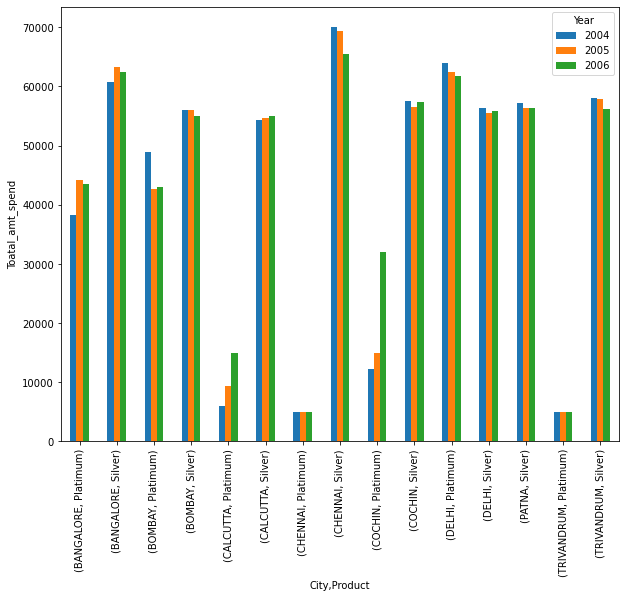

In [27]:
pd.pivot_table(data2,index = ['City','Product'],columns = 'Year',values = 'Amount').plot.bar(figsize = (10,8))
plt.ylabel("Toatal_amt_spend")
plt.show()

4. Create graphs for
 a. Monthly comparison of total spends, city wise


In [28]:

data2.head(2)

,key_0,No,Customer_x,Age,City,Product,Limit,Company,Segment,Sl No:,...,_merge,SL No:,Customer,Month_y,Amount_y,Unnamed: 4,Amount,Mon_Profit,Profit,Year
0,A1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,...,both,NaN,A1,12-Jan-04,495414.75,NaN,NaN,9943.95,288.37455,2004
1,A1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,...,both,2.0,A1,3-Jan-04,245899.02,NaN,NaN,-239571.78,NaN,2004


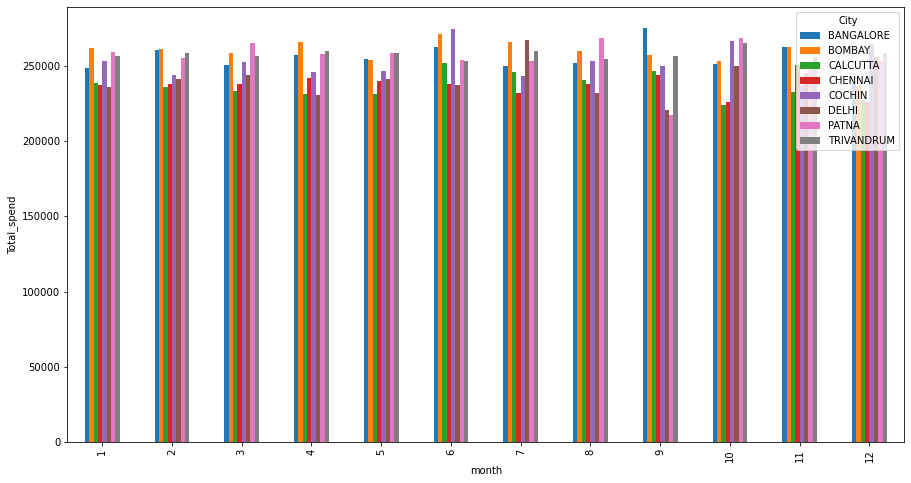

In [29]:
data2['month'] = pd.DatetimeIndex(data2.Month_x).month
pd.pivot_table(data2,index = ['month'],columns = 'City', values = 'Amount_y').plot.bar(figsize = (15,8))
plt.ylabel('Total_spend')
plt.show()

 b. Comparison of yearly spend on air tickets

In [32]:
data2.head(2)

,key_0,No,Customer_x,Age,City,Product,Limit,Company,Segment,Sl No:,...,SL No:,Customer,Month_y,Amount_y,Unnamed: 4,Amount,Mon_Profit,Profit,Year,month
0,A1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,...,NaN,A1,12-Jan-04,495414.75,NaN,NaN,9943.95,288.37455,2004,1
1,A1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,...,2.0,A1,3-Jan-04,245899.02,NaN,NaN,-239571.78,NaN,2004,1


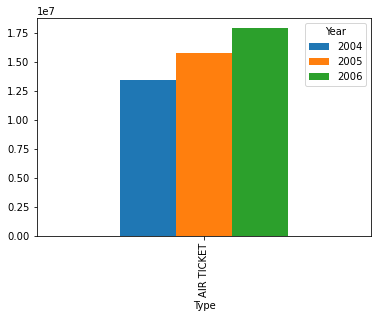

In [33]:
pd.pivot_table(data = data2[data2.Type=='AIR TICKET'], index = 'Type', columns='Year', 
               values='Amount', aggfunc='sum').plot(kind='bar')
plt.show()


 c. Comparison of monthly spend for each product (look for any seasonality
 that exists in terms of spend)

In [36]:
data.head(3)

,key_0,No,Customer_x,Age,City,Product,Limit,Company,Segment,Sl No:,Customer_y,Month,Type,Amount,_merge,month
0,A1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,A1,2004-01-12,JEWELLERY,485470.80,both,1
1,A1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,A1,2004-01-03,PETRO,410556.13,both,1
2,A1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,A1,2004-01-15,CLOTHES,23740.46,both,1


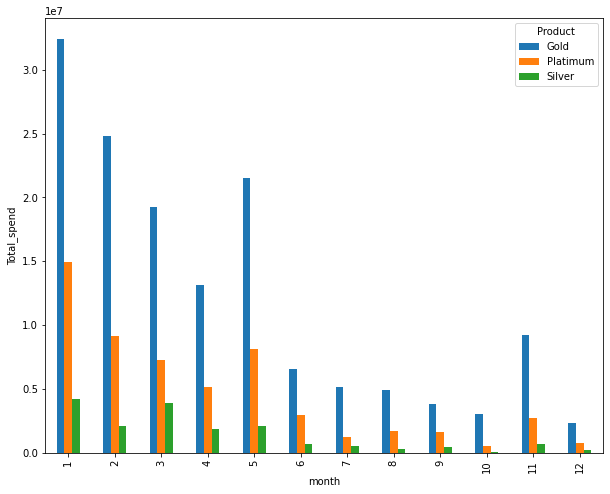

In [30]:
data['month'] = pd.DatetimeIndex(data.Month).month
pd.pivot_table(data,index = 'month',columns = 'Product',values = 'Amount',aggfunc = sum ).plot.bar(figsize = (10,8))
plt.ylabel('Total_spend')
plt.show()

5. Write user defined PYTHON function to perform the following analysis:
You need to find top 10 customers for each city in terms of their repayment amount by 
different products and by different time periods i.e. year or month. The user should be able 
to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the 
function should automatically take these inputs while identifying the top 10 customers.

In [55]:
data2



,key_0,No,Customer_x,Age,City,Product,Limit,Company,Segment,Sl No:,...,SL No:,Customer,Month_y,Amount_y,Unnamed: 4,Amount,Mon_Profit,Profit,Year,month
0,A1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,...,NaN,A1,12-Jan-04,495414.75,NaN,NaN,9943.95,288.37455,2004,1
1,A1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,...,2.0,A1,3-Jan-04,245899.02,NaN,NaN,-239571.78,NaN,2004,1
2,A1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,...,3.0,A1,15-Jan-04,259490.06,NaN,NaN,-225980.74,NaN,2004,1
3,A1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,...,4.0,A1,25-Jan-04,437555.12,NaN,NaN,-47915.68,NaN,2004,1
4,A1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,...,5.0,A1,17-Jan-05,165972.88,NaN,NaN,-319497.92,NaN,2005,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37279,A96,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,...,98.0,A96,25-Jan-04,310992.30,NaN,100000.0,256262.64,7431.61656,2004,1
37280,A97,97,A97,58.0,TRIVANDRUM,Platimum,5000.0,C20,Govt,99,...,99.0,A97,12-Jan-04,121874.90,NaN,5000.0,116874.90,3389.37210,2004,1
37281,A98,98,A98,51.0,CALCUTTA,Platimum,5000.5,C21,Normal Salary,100,...,100.0,A98,3-Jan-04,337815.57,NaN,5000.5,332815.07,9651.63703,2004,1
37282,A99,99,A99,35.0,CALCUTTA,Platimum,5001.0,C22,Self Employed,101,...,101.0,A99,15-Jan-04,25682.73,NaN,5001.0,20681.73,599.77017,2004,1


In [54]:

def Top_10_cust(products,timeperiod):
    return data2.loc[(data2.Product == products)].groupby(['Customer','City','Product',timeperiod]).agg({'Amount':'sum'}).sort_values('Amount',ascending = False).head(10)

In [55]:
products=str(input("Please Enter Product Category and product category should be in Gold/Silver/Platinum: "))
timeperiod=str(input("Please Enter Time Period and time period should be in yearly/monthly: "))

Please Enter Product Category and product category should be in Gold/Silver/Platinum: Silver
Please Enter Time Period and time period should be in yearly/monthly: Year


In [56]:

top10_Customers_Analysis=Top_10_cust(products,timeperiod)

top10_Customers_Analysis

,,,,Amount
Customer,City,Product,Year,
A22,BOMBAY,Silver,2005,20350000.0
A46,PATNA,Silver,2005,18850000.0
A22,BOMBAY,Silver,2006,17700000.0
A23,BANGALORE,Silver,2005,17500175.0
A24,DELHI,Silver,2005,17400348.0
A22,BOMBAY,Silver,2004,16650000.0
A25,COCHIN,Silver,2006,16000480.0
A23,BANGALORE,Silver,2006,14950149.5
A46,PATNA,Silver,2006,13600000.0
